Lazar Novakovic
Assignment 5 
Pre class 3 March 2020



In order to simulate this equal-mass binary star system, we will need to solve for its equations of motion. For this, there are many techniques, however often the solution of the (eoms) requires the solution of difficult to solve differential equations. 

That is where Runge-Kutta comes into play.

First, let $\vec{r_{1}}$ and $\vec{r_{2}}$ represent positional vectors for the two stars. The vector radial between the two, with magnitude of the distance between the two is

$$\vec{R} = \vec{r_{2}}-\vec{r_{1}}$$

Of course, the respective derivatives are the velocities...

$$\vec{V} = \vec{v_{2}}-\vec{v_{1}}$$

Now, this systsem assumes no outside forces, therefore the center of mass of the system should be constant velocity.

$$\vec{r_{com}} = \frac{m_1 \vec{r_{1}} + m_2 \vec{r_{2}}}{m_1 + m_2}$$

$$\vec{{a_{com}}} = 0  $$

With the reduced mass $\mu = \frac{m_1 m_2}{m_1 + m_2}$ 
The Lagrangian of the system is

$$\mathcal L = \frac{1}{2} \mu \dot{\vec{R}}^2 - \frac{-Gm_1 m_2}{R^2} \vec{R}$$

Since we have $\vec{R} = x \hat{x} + y \hat{y}$

The corresponding equations of motion satisfy the Runge-Kutta rules as we have 

$$\frac{d^2 q_j}{dt^2} = -\frac{Gm_i}{R^3} (q_{i+1}-q_{i})$$

(As from lecture derivation)
Using the k definitions

$$\begin{eqnarray} {\bf y}{n+1}&\simeq &{\bf y}{n}+{\bf k{2}}\ {\bf k{2}}&=&h {\bf f}(t{n}+h/2,{\bf y}{n}+\frac{{\bf k{1}}}{2})\qquad {\bf k}{1}=h{\bf f}(tn,{\bf y}{n}) \end{eqnarray}$$

$$\begin{eqnarray} {\bf y}{n+1}&\simeq &{\bf y}{n}+\frac{1}{6}({\bf k{1}}+2{\bf k{2}}+2{\bf k{3}}+{\bf k{4}})\ {\bf k}_{1}&=&h{\bf f}(tn,{\bf y}{n})\ {\bf k{2}}&=&h {\bf f}(t{n}+h/2,{\bf y}{n}+\frac{{\bf k{1}}}{2})\ {\bf k{3}}&=&h {\bf f}(t{n}+h/2,{\bf y}{n}+\frac{{\bf k{2}}}{2})\ {\bf k{4}}&=&h {\bf f}(t{n}+h,{\bf y}{n}+{\bf k{3}}) \end{eqnarray} $$

For our case, the respectice derivatives of 

$$ \frac{dv_{q_{1}}}{dt} = -\frac{Gm_{i+1}}{R^3} R_q $$
(Of course, switching frames from one star to another will switch the sign).

Finally, we can begin using given values, $Gm_1 = Gm_2 = 1$ 
(and eccentricity was said to be set to 1)

First let us define the "$f(t,y)$" function referenced and the RK4 method...

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Passing in a y[]...

def f(t,y):       
    q1 = y[0] - y[4]           
    q2 = y[2] - y[6]      
    
    R = np.sqrt(q1**2 + q2**2)  
    f = np.zeros(8) # This is borrowed from lecture.
    f[0] = y[1]                
    f[1] = -q1/(R**3.0)       
    f[2] = y[3]               
    f[3] = -q2/(R**3.0)        
    f[4] = y[5]                
    f[5] = q1/(R**3.0)         
    f[6] = y[7]                
    f[7] = q2/(R**3.0)   
    return f

def rk4(y,t,h): # h being the interval step
    k1=np.zeros(8) # This is borrowed from lecture.
    k2=np.zeros(8)
    k3=np.zeros(8)
    k4=np.zeros(8)

    k1 = h*f(t, y)
    k2 = h*f(t + (1.0/2.0)*h, y + (1.0/2.0)*k1)
    k3 = h*f(t + (1.0/2.0)*h, y + (1.0/2.0)*k2)
    k4 = h*f(t + h, y + k3)
    
    y = y +  (k1 + 2 * k2 + 2 * k3 + k4)/6.0
    
    return y

From lecture note, integrating...

Creating x y range arrays for both planets and evaluating using the functions...

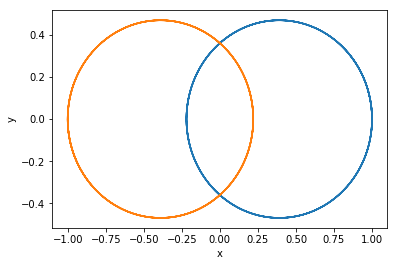

In [31]:
x1a = []
x2a = []
y1a = []
y2a = []

y=[1.0,0.,0.0,0.3, -1.0,0.,0.,-0.3]
q1 = y[0] - y[4]           
q2 = y[2] - y[6]  
Rb = np.sqrt(q1**2 + q2**2)  
h = 0.01
t= 0
tend = np.sqrt(2.0*4.0*(np.pi**2)* (Rb**3))



while(t<tend):
    
    if((t+h)>tend):
        h=tend-t
    y = rk4(y,t,h)
    x1a=np.append(x1a,y[0])
    y1a=np.append(y1a,y[2])
    x2a=np.append(x2a,y[4])
    y2a=np.append(y2a,y[6])
    t = t+h
    
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x1a,y1a,label="Star 1")
plt.plot(x2a,y2a,label="Star 2")

plt.show()

Using the Orbital Period equation (with eccentricity = 1 for this homework as mentioned)
$$ T = \sqrt{\frac{4\pi^2 R^3}{G\mu}} $$

We can determine the time it takes to reach 100 orbits...

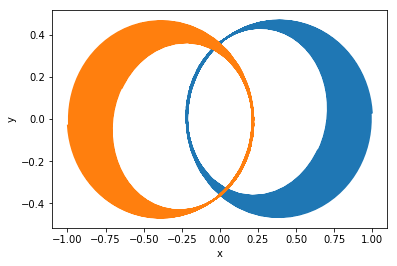

In [32]:
x1b = []
x2b = []
y1b = []
y2b = []

y=[1.0,0.,0.0,0.3, -1.0,0.,0.,-0.3]
q1 = y[0] - y[4]           
q2 = y[2] - y[6]  
Rb = np.sqrt(q1**2 + q2**2)  
h = 0.1
t= 0
tend2 = 10*np.sqrt(2.0*4.0*(np.pi**2)* (Rb**3))


while(t<tend2):
    
    if((t+h)>tend2):
        h=tend2-t
    y = rk4(y,t,h)
    x1b=np.append(x1b,y[0])
    y1b=np.append(y1b,y[2])
    x2b=np.append(x2b,y[4])
    y2b=np.append(y2b,y[6])
    t = t+h
    
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x1b,y1b,label="Star 1")
plt.plot(x2b,y2b,label="Star 2")

plt.show()

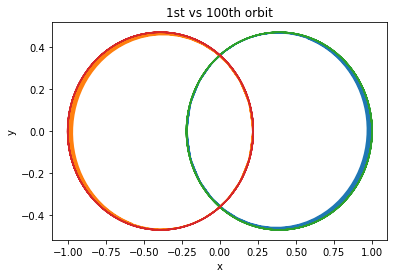

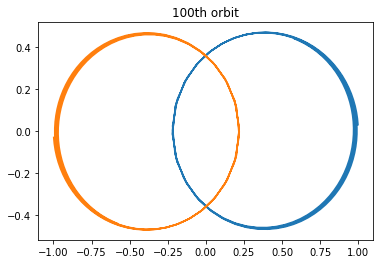

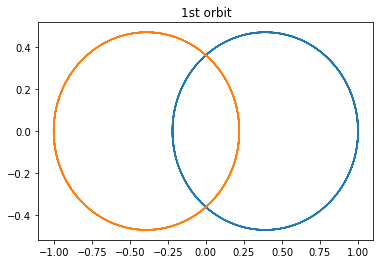

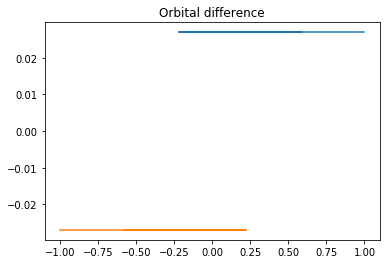

In [33]:
x1c = []
x2c= []
y1c = []
y2c = []

x1d = []
x2d= []
y1d = []
y2d = []

y=[1.0,0.,0.0,0.3, -1.0,0.,0.,-0.3]
q1 = y[0] - y[4]           
q2 = y[2] - y[6]  
Rb = np.sqrt(q1**2 + q2**2)  
h = 0.1
t= 99*np.sqrt(2.0*4.0*(np.pi**2)* (Rb**3))
tend2 = 100*np.sqrt(2.0*4.0*(np.pi**2)* (Rb**3))


while(t<tend2):
    j = 0
    if((t+h)>tend2):
        h=tend2-t
    y = rk4(y,t,h)
    x1c=np.append(x1c,y[0])
    y1c=np.append(y1c,y[2])
    x2c=np.append(x2c,y[4])
    y2c=np.append(y2c,y[6])
    
    x1d.append(x1c[j]- x1a[j])
    y1d.append(y1c[j]- y1a[j])
    x2d.append(x2c[j]- x2a[j])
    y2d.append(y2c[j]- y2a[j])
    
    j = j + 1
    t = t+h
    
plt.xlabel("x")
plt.ylabel("y")

titlec = "100th orbit"
titlea = "1st orbit"
titlet = "1st vs 100th orbit"

plt.plot(x1c,y1c,label="Star 1-100th orbit")
plt.plot(x2c,y2c,label="Star 2-100th orbit")
plt.plot(x1a,y1a,label="Star 1-1st orbit")
plt.plot(x2a,y2a,label="Star 2-1st orbit")
plt.title(titlet)
plt.show()

plt.plot(x1c,y1c,label="Star 1-100th orbit")
plt.plot(x2c,y2c,label="Star 2-100th orbit")
plt.title(titlec)
plt.show()

plt.plot(x1a,y1a,label="Star 1-1st orbit")
plt.plot(x2a,y2a,label="Star 2-1st orbit")
plt.title(titlea)
plt.show()


plt.plot(x1c,y1d,label="Star 1-1st orbit")
plt.plot(x2c,y2d,label="Star 2-1st orbit")
plt.title("Orbital difference")
plt.show()
